In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
def load_data(file_path):
    return pd.read_csv(file_path)

# Perform basic statistical analysis
def analyze_data(df):
    # Replace 'relevant_column' with the actual column names you want to analyze
    summary = df.describe()
    return summary

# Visualize the data with histograms and scatter plots
def visualize_data(df):
    # Histogram of a relevant column
    plt.figure(figsize=(10, 6))
    df['relevant_column'].hist(bins=30)
    plt.title('Distribution of Relevant Column')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
    # Scatter plot between two columns
    plt.figure(figsize=(10, 6))
    plt.scatter(df['column_x'], df['column_y'])
    plt.title('Relationship between Column X and Column Y')
    plt.xlabel('Column X')
    plt.ylabel('Column Y')
    plt.grid(True)
    plt.show()

def main():
    file_path = 'Air_Quality.csv'  # Path to the CSV file
    df = load_data(file_path)
    print("Statistical Summary:", analyze_data(df))
    visualize_data(df)

if __name__ == '__main__':
    main()


Statistical Summary:            Unique ID  Indicator ID   Geo Join ID    Data Value  Message
count   18025.000000  18025.000000  1.801600e+04  18025.000000      0.0
mean   426387.692705    434.830180  5.906303e+05     21.428616      NaN
std    250489.450630    115.852371  7.769549e+06     23.999345      NaN
min    121644.000000    365.000000  1.000000e+00      0.000000      NaN
25%    175303.000000    365.000000  2.020000e+02      8.900000      NaN
50%    410803.000000    375.000000  3.030000e+02     15.200000      NaN
75%    649893.000000    386.000000  4.040000e+02     26.700000      NaN
max    828353.000000    661.000000  1.051061e+08    424.700000      NaN


KeyError: 'relevant_column'

<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd

def load_data(file_path):
    return pd.read_csv(file_path)

def main():
    file_path = 'Air_Quality.csv'  # Path to the CSV file
    df = load_data(file_path)
    # Print column names to help identify which columns are available
    print("Columns in the dataset:", df.columns.tolist())

if __name__ == '__main__':
    main()


Columns in the dataset: ['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info', 'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period', 'Start_Date', 'Data Value', 'Message']


In [ ]:
def visualize_data(df):
    # Example column names: 'PM2.5' and 'PM10'
    if 'PM2.5' in df.columns:
        plt.figure(figsize=(10, 6))
        df['PM2.5'].hist(bins=30)
        plt.title('Distribution of PM2.5')
        plt.xlabel('PM2.5 Levels')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    
    if 'PM10' in df.columns and 'PM2.5' in df.columns:
        plt.figure(figsize=(10, 6))
        plt.scatter(df['PM10'], df['PM2.5'])
        plt.title('Relationship between PM10 and PM2.5')
        plt.xlabel('PM10 Levels')
        plt.ylabel('PM2.5 Levels')
        plt.grid(True)
        plt.show()

# Ensure to update the main function accordingly to include visualization
def main():
    file_path = 'Air_Quality.csv'  # Path to the CSV file
    df = load_data(file_path)
    print("Statistical Summary:", df.describe())  # General statistical summary
    visualize_data(df)

if __name__ == '__main__':
    main()


Statistical Summary:            Unique ID  Indicator ID   Geo Join ID    Data Value  Message
count   18025.000000  18025.000000  1.801600e+04  18025.000000      0.0
mean   426387.692705    434.830180  5.906303e+05     21.428616      NaN
std    250489.450630    115.852371  7.769549e+06     23.999345      NaN
min    121644.000000    365.000000  1.000000e+00      0.000000      NaN
25%    175303.000000    365.000000  2.020000e+02      8.900000      NaN
50%    410803.000000    375.000000  3.030000e+02     15.200000      NaN
75%    649893.000000    386.000000  4.040000e+02     26.700000      NaN
max    828353.000000    661.000000  1.051061e+08    424.700000      NaN


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    return pd.read_csv(file_path)

def plot_time_series(df, column, title):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df[column], marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Concentration')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_distribution(df, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(title)
    plt.xlabel('Concentration')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

def plot_correlation_heatmap(df, columns, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    plt.show()

def main():
    file_path = 'Air_Quality.csv'
    df = load_data(file_path)
    
    # Print column names to verify what we have in the dataset
    print("Columns in the dataset:", df.columns.tolist())

    # Convert 'Date' column to datetime if present
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])

    # Check for the presence of columns before attempting to analyze or plot
    if 'PM2.5' in df.columns and 'PM10' in df.columns:
        print("Statistical Summary for PM2.5 and PM10:\n", df[['PM2.5', 'PM10']].describe())
        if 'PM2.5' in df.columns:
            plot_time_series(df, 'PM2.5', 'Time Series of PM2.5')
            plot_distribution(df, 'PM2.5', 'Distribution of PM2.5 Levels')
        if 'PM10' in df.columns:
            plot_distribution(df, 'PM10', 'Distribution of PM10 Levels')
        plot_correlation_heatmap(df, ['PM2.5', 'PM10'], 'Correlation Heatmap')

if __name__ == '__main__':
    main()



Columns in the dataset: ['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info', 'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period', 'Start_Date', 'Data Value', 'Message']


In [ ]:
import pandas as pd

def load_data(file_path):
    return pd.read_csv(file_path)

def summarize_data(df):
    summary_stats = df['Data Value'].describe()
    max_date = df[df['Data Value'] == summary_stats['max']]['Start_Date'].iloc[0]
    min_date = df[df['Data Value'] == summary_stats['min']]['Start_Date'].iloc[0]
    
    # Building the narrative
    narrative = f"""
    Air Quality Data Summary:
    -------------------------
    - The average air quality index recorded was {summary_stats['mean']:.2f}, with a standard deviation of {summary_stats['std']:.2f}.
    - The highest pollution level recorded was {summary_stats['max']:.2f} on {max_date}.
    - The lowest pollution level recorded was {summary_stats['min']:.2f} on {min_date}.
    - The median pollution level throughout the period was {summary_stats['50%']:.2f}.
    
    Insights:
    ---------
    The data suggests that there are fluctuations in air quality, with certain days experiencing significantly higher pollution levels.
    Stakeholders should consider these peaks as potential health risks, particularly to vulnerable populations such as children, the elderly, and those with respiratory conditions.
    It's advisable to investigate the causes of these high pollution days and implement targeted measures to improve air quality, such as traffic reduction initiatives, stricter industrial regulations, or increased public awareness campaigns.
    
    Conclusion:
    -----------
    Effective monitoring and management of air quality is crucial. The insights provided by this data should inform policy adjustments and public health advisories to mitigate the impact of poor air quality on the community.
    """
    
    return narrative

def main():
    file_path = 'Air_Quality.csv'  # Ensure the file path is correct
    df = load_data(file_path)
    
    # Ensure the 'Start_Date' and 'Data Value' columns are present and properly formatted
    if 'Start_Date' in df.columns and 'Data Value' in df.columns:
        df['Start_Date'] = pd.to_datetime(df['Start_Date'])
        narrative = summarize_data(df)
        print(narrative)

if __name__ == '__main__':
    main()



    Air Quality Data Summary:
    -------------------------
    - The average air quality index recorded was 21.43, with a standard deviation of 24.00.
    - The highest pollution level recorded was 424.70 on 2005-01-01 00:00:00.
    - The lowest pollution level recorded was 0.00 on 2013-01-01 00:00:00.
    - The median pollution level throughout the period was 15.20.
    
    Insights:
    ---------
    The data suggests that there are fluctuations in air quality, with certain days experiencing significantly higher pollution levels.
    Stakeholders should consider these peaks as potential health risks, particularly to vulnerable populations such as children, the elderly, and those with respiratory conditions.
    It's advisable to investigate the causes of these high pollution days and implement targeted measures to improve air quality, such as traffic reduction initiatives, stricter industrial regulations, or increased public awareness campaigns.
    
    Conclusion:
    ----------

Statistical Summary for Data Value:
 count    18025.000000
mean        21.428616
std         23.999345
min          0.000000
25%          8.900000
50%         15.200000
75%         26.700000
max        424.700000
Name: Data Value, dtype: float64


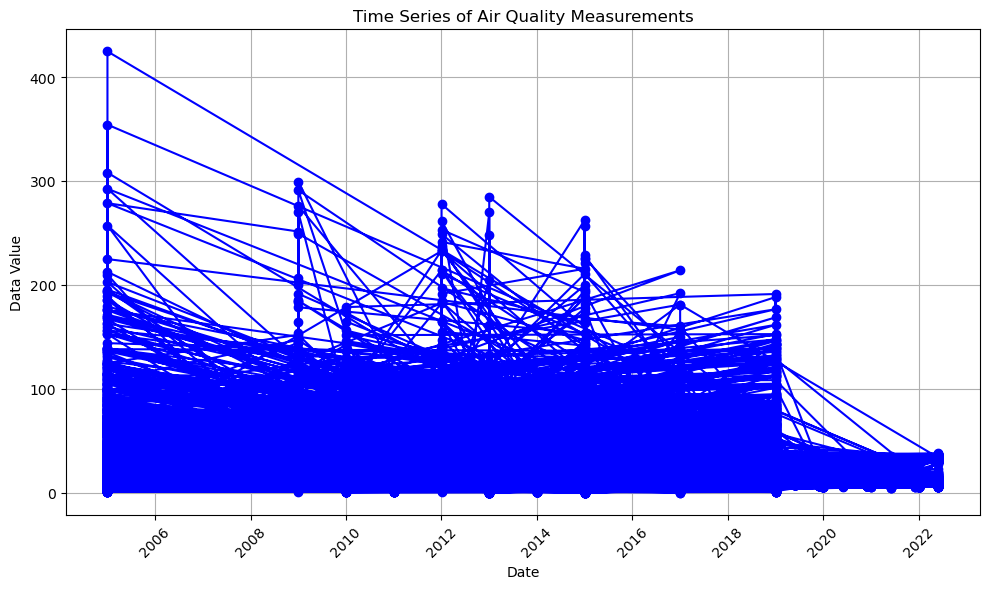

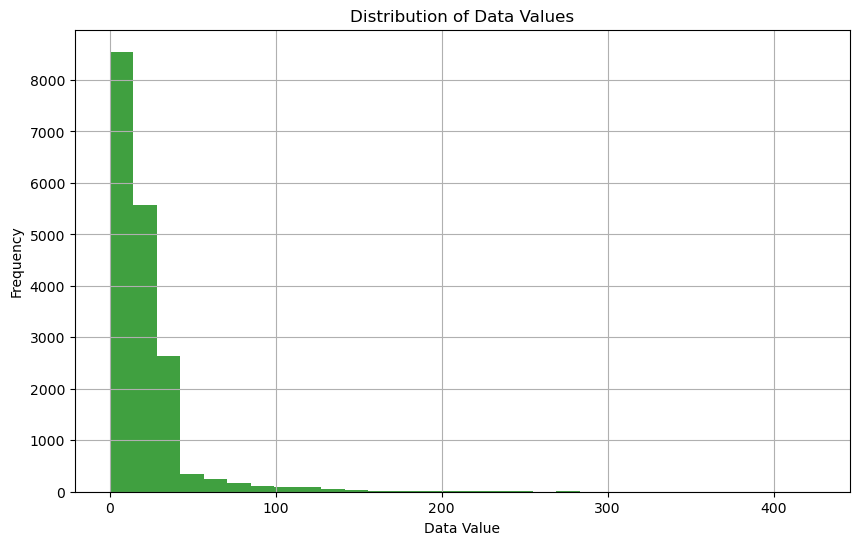

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data(file_path):
    # Load data from CSV file into a DataFrame
    df = pd.read_csv(file_path)
    return df

def plot_time_series(df, time_column, data_column):
    plt.figure(figsize=(10, 6))
    plt.plot(df[time_column], df[data_column], marker='o', linestyle='-', color='blue')
    plt.title('Time Series of Air Quality Measurements')
    plt.xlabel('Date')
    plt.ylabel('Data Value')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_distribution(df, data_column):
    plt.figure(figsize=(10, 6))
    plt.hist(df[data_column], bins=30, color='green', alpha=0.75)
    plt.title('Distribution of Data Values')
    plt.xlabel('Data Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

def main():
    file_path = 'Air_Quality.csv'
    df = load_data(file_path)
    
    # Convert 'Start_Date' column to datetime if it's not already
    if 'Start_Date' in df.columns:
        df['Start_Date'] = pd.to_datetime(df['Start_Date'])

    # Check for the presence of 'Data Value' column
    if 'Data Value' in df.columns:
        print("Statistical Summary for Data Value:\n", df['Data Value'].describe())
        plot_time_series(df, 'Start_Date', 'Data Value')
        plot_distribution(df, 'Data Value')

if __name__ == '__main__':
    main()
